In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

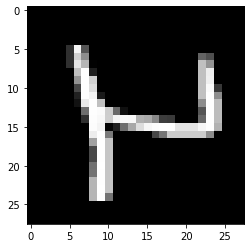

In [4]:
import matplotlib.pyplot as plt
plt.imshow(tf.squeeze(tf.image.flip_left_right(x_train[2][...,tf.newaxis])),cmap='Greys_r')

In [5]:
type(tf.keras.preprocessing.image.array_to_img(tf.expand_dims(x_train[2],axis=-1)))

PIL.Image.Image

In [6]:
x_train[2].shape

(28, 28)

In [7]:
tf.image.flip_left_right(x_train[2][...,tf.newaxis])

<tf.Tensor: id=9, shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [

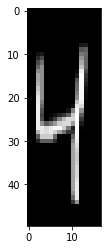

In [8]:
plt.imshow(tf.squeeze(tf.image.resize(x_train[2][...,tf.newaxis],(50,17))),cmap='Greys_r')

In [9]:
a=[1,2,3,4,5]
type(a[0])

int

In [10]:
a=tf.cast(a,float)

In [11]:
a.numpy()

array([1., 2., 3., 4., 5.], dtype=float32)

In [12]:
tf.keras.preprocessing.image.array_to_img(tf.expand_dims(x_train[2],-1))

In [13]:
tf.keras.layers.Input

<function tensorflow.python.keras.engine.input_layer.Input(shape=None, batch_size=None, name=None, dtype=None, sparse=False, tensor=None, ragged=False, **kwargs)>

In [14]:
tf.keras.Input

<function tensorflow.python.keras.engine.input_layer.Input(shape=None, batch_size=None, name=None, dtype=None, sparse=False, tensor=None, ragged=False, **kwargs)>

In [184]:
input_tensor = tf.keras.layers.Input(shape=(28,28,1))
a = tf.keras.layers.Conv2D(6,3,activation='relu',padding='same')(input_tensor)
a = tf.keras.layers.Conv2D(18,3,activation='relu',padding='same')(a)
a = tf.keras.layers.MaxPool2D(strides=1,padding='same')(a)
a = tf.keras.layers.Conv2D(12,3,activation='relu',padding='same')(a)

a = tf.keras.layers.Conv2D(1,3,activation='relu',padding='same')(a)
a = tf.keras.layers.Flatten()(a)
a = tf.keras.layers.Dense(10,activation='softmax')(a)

model = tf.keras.Model(input_tensor,a)
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 18)        990       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 18)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 12)        1956      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 1)         109       
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0  

In [185]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='Adam',metrics=['acc'])


In [186]:
class DisplayCallback(tf.keras.callbacks.Callback): # Custom Callback , tf.keras.callbacks.Callback
  def on_epoch_end(self, epoch, logs=None):
    
    plt.imshow(model.get_layer('conv2d_66').output)
    

In [187]:
model.fit(x_train[:2000][...,tf.newaxis],y_train[:2000][...,tf.newaxis],epochs=50,validation_split=.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/50
1600/1600 [==============================] - 8s 5ms/sample - loss: 2.8815 - acc: 0.1725 - val_loss: 2.0184 - val_acc: 0.3275
Epoch 2/50
1600/1600 [==============================] - 7s 4ms/sample - loss: 1.7388 - acc: 0.3856 - val_loss: 1.3335 - val_acc: 0.5375
Epoch 3/50
1600/1600 [==============================] - 7s 5ms/sample - loss: 1.1865 - acc: 0.5738 - val_loss: 1.0482 - val_acc: 0.6350
Epoch 4/50
1600/1600 [==============================] - 7s 4ms/sample - loss: 0.9025 - acc: 0.6837 - val_loss: 0.8576 - val_acc: 0.7125
Epoch 5/50
1600/1600 [==============================] - 7s 4ms/sample - loss: 0.6635 - acc: 0.7837 - val_loss: 0.5819 - val_acc: 0.8025
Epoch 6/50
1600/1600 [==============================] - 7s 4ms/sample - loss: 0.4625 - acc: 0.8594 - val_loss: 0.4849 - val_acc: 0.8400
Epoch 7/50
1600/1600 [==============================] - 7s 4ms/sample - loss: 0.3620 - acc: 0.8919 - val_loss: 0.4474 - val_acc: 0.8525
E

KeyboardInterrupt: 

[[3.0960603e-08]]


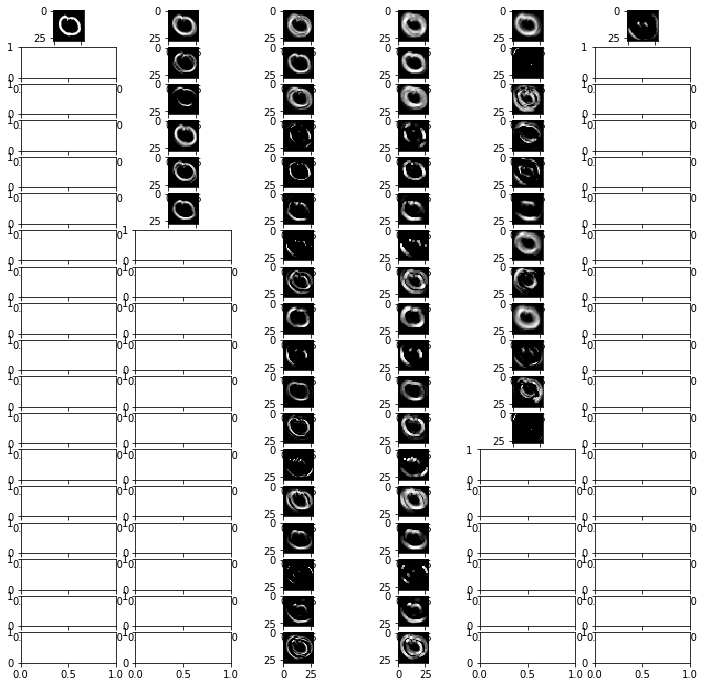

In [183]:
"""DETECT 3 MODEL"""
i=108
print(model.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')))
fig,axes=plt.subplots(18,len(model.layers)-2,figsize=(12,12))
for j in range(6):
    iter = model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j].shape[3]
    for k in range(iter):
#         if model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j].shape[3] !=1
        axes[k][j].imshow(model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j][:,
    :,:,k].reshape(28,28),cmap='Greys_r')
    
# axes[1].imshow(model2.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')).reshape(28,28),cmap='Greys_r')
# axes[0].imshow(x_train[i],cmap='Greys_r')
# axes[2].imshow(model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')).reshape(28,28),cmap='Greys_r')

[[3.6786136e-01 6.4612926e-11 4.6640735e-02 3.7314800e-05 5.7115257e-01
  6.2715732e-03 7.3741637e-03 6.1298540e-04 4.9324964e-05 2.6632799e-08]]


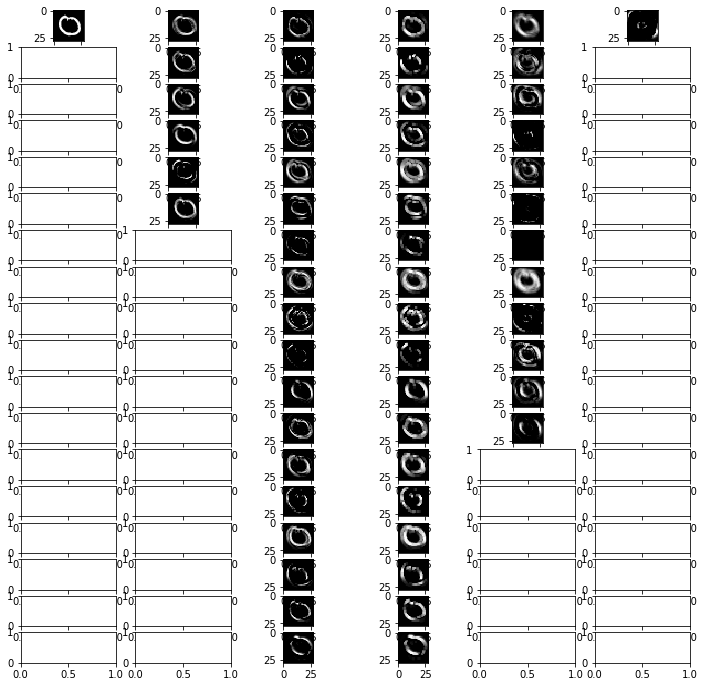

In [189]:
"""MultiClass  MODEL"""
i=108
print(model.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')))
fig,axes=plt.subplots(18,len(model.layers)-2,figsize=(12,12))
for j in range(6):
    iter = model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j].shape[3]
    for k in range(iter):
#         if model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j].shape[3] !=1
        axes[k][j].imshow(model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32'))[j][:,
    :,:,k].reshape(28,28),cmap='Greys_r')
    
# axes[1].imshow(model2.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')).reshape(28,28),cmap='Greys_r')
# axes[0].imshow(x_train[i],cmap='Greys_r')
# axes[2].imshow(model3.predict(tf.cast(x_train[i].reshape(1,28,28,1),'float32')).reshape(28,28),cmap='Greys_r')

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 18)        990       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 12)        1956      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         109       
_________________________________________________________________
flatten (Flatten)            (None, 784)               0     

In [188]:
model3 = tf.keras.Model(inputs=model.input,outputs=[output for output in [layers.output\
                                                   for layers in model.layers]])

In [170]:
model3.predict(x_train[0].reshape(1,28,28,1))[0][:,:,:,0].shape

(1, 28, 28)

In [120]:
model3.predict(x_train[0].reshape(1,28,28,1)).shape

(1, 28, 28, 1)

In [149]:
model.layers

AttributeError: 'list' object has no attribute 'output'

In [112]:
model.layers[3]

In [63]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  